In [1]:
import os
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import torchvision.transforms as T
from dataset import Mito_Dataset,augmentation,val_augmentation, show_image
from torch.utils.data import DataLoader
from torch.optim import Adam
device = 'mps'
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_data = Mito_Dataset(path='../data/training/',transform = augmentation)
val_data = Mito_Dataset(path='../data/testing/',transform=val_augmentation)
train_loder = DataLoader(train_data,batch_size=15,shuffle=True)
val_loder = DataLoader(val_data,batch_size=15)

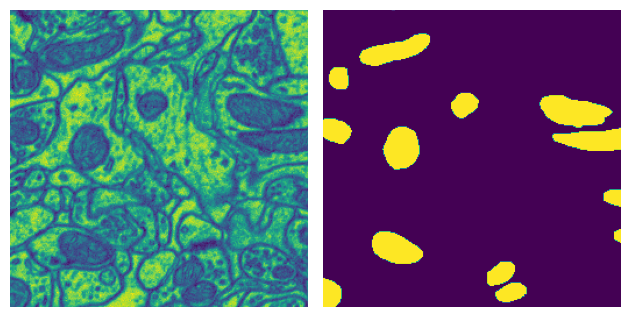

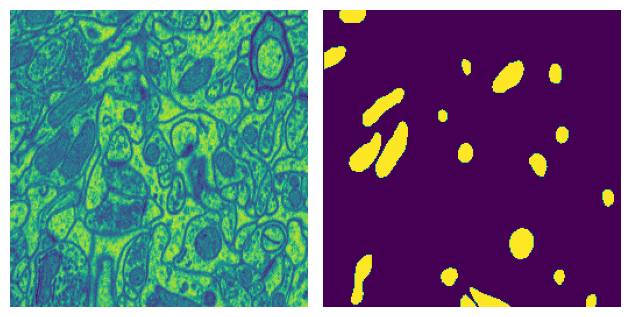

In [3]:
for X,y in train_data:
    X,y = X.to(device),y.to(device)
    break
show_image(X,y)
for X,y in val_data:
    X,y = X.to(device),y.to(device)
    break
show_image(X,y)

In [5]:
from model import Unet, Unet_Dropout, DiceLoss
from train import train_one_epoch,val_one_epoch,train_model

## With DropOut

In [6]:
torch.manual_seed(1234)
model = Unet_Dropout(initial_channel=16).to(device)
dice_loss = DiceLoss()
optimizer = Adam(model.parameters(),lr = 1e-3)
model_parms = train_model(model,optimizer,train_loder,val_loder,dice_loss,device,train_one_epoch,val_one_epoch,max_counter=20)

In [8]:
model.load_state_dict(model_parms)
val_one_epoch(model,val_loder,dice_loss,device,epoch = 1)

tensor(0.8826)

In [31]:
parms_list = list()
for key,value in  model_parms.items():
    if "weight" in key:
        parms_list += value.view(-1).tolist()

In [37]:
import pandas as pd

ModuleNotFoundError: No module named 'pandas'

In [36]:
torch.tensor(parms_list)

tensor(-0.7371)

## Without DropOut

In [8]:
torch.manual_seed(1234)
model = Unet(initial_channel=16).to(device)
dice_loss = DiceLoss()
optimizer = Adam(model.parameters(),lr = 1e-3)
model_parms = train_model(model,optimizer,train_loder,val_loder,dice_loss,device,train_one_epoch,val_one_epoch,max_counter=20,max_epoch=100)

In [17]:
model.load_state_dict(model_parms)
val_one_epoch(model,val_loder,dice_loss,device,epoch = 1)

tensor(0.8858)